In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [25]:
df=pd.read_csv("Admission_Predict .csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [26]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [27]:
df.shape

(400, 9)

In [28]:
df.columns = df.columns.str.rstrip() 

In [29]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [30]:
df.loc[df['Chance of Admit'] >=0.80, 'Chance of Admit']=1
df.loc[df['Chance of Admit'] < 0.80, 'Chance of Admit']=0

In [31]:
df['Chance of Admit']

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

In [32]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [33]:
df=df.drop('Serial No.', axis=1)

In [34]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1.0
396,325,107,3,3.0,3.5,9.11,1,1.0
397,330,116,4,5.0,4.5,9.45,1,1.0
398,312,103,3,3.5,4.0,8.78,0,0.0


In [35]:
x = df.iloc [ :,0:7].values
y = df.iloc [:,7].values

In [36]:
y

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [39]:
print(x_train.shape,end='')
print(x_test.shape)

(300, 7)(100, 7)


In [73]:
model = DecisionTreeClassifier (criterion = 'entropy')
model.fit(x_train , y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [74]:
y_pred=model.predict(x_test)

In [75]:
matrix=confusion_matrix(y_test,y_pred,labels=[0.0,1.0])

In [76]:
matrix

array([[62,  9],
       [ 7, 22]], dtype=int64)

In [77]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree Model =', acc)

Accuracy of Decision Tree Model = 0.84


In [78]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print('Classification Report ', cr)

Classification Report                precision    recall  f1-score   support

         0.0       0.90      0.87      0.89        71
         1.0       0.71      0.76      0.73        29

    accuracy                           0.84       100
   macro avg       0.80      0.82      0.81       100
weighted avg       0.84      0.84      0.84       100



In [79]:
feature_names = df.columns[0:7]
print(feature_names,end='')

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [80]:
class_names=[str(x) for x in model.classes_]

In [81]:
class_names

['0.0', '1.0']

In [82]:
from sklearn.tree import plot_tree

In [83]:
fig=plt.figure(figsize=(50,30))

<Figure size 5000x3000 with 0 Axes>

[Text(0.525, 0.9615384615384616, 'CGPA <= 8.845\nentropy = 0.915\nsamples = 300\nvalue = [201, 99]\nclass = 0.0'),
 Text(0.25, 0.8846153846153846, 'GRE Score <= 320.5\nentropy = 0.29\nsamples = 197\nvalue = [187, 10]\nclass = 0.0'),
 Text(0.1, 0.8076923076923077, 'CGPA <= 8.675\nentropy = 0.093\nsamples = 168\nvalue = [166, 2]\nclass = 0.0'),
 Text(0.05, 0.7307692307692307, 'entropy = 0.0\nsamples = 153\nvalue = [153, 0]\nclass = 0.0'),
 Text(0.15, 0.7307692307692307, 'Research <= 0.5\nentropy = 0.567\nsamples = 15\nvalue = [13, 2]\nclass = 0.0'),
 Text(0.1, 0.6538461538461539, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0.0'),
 Text(0.2, 0.6538461538461539, 'TOEFL Score <= 108.0\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 0.0'),
 Text(0.15, 0.5769230769230769, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1.0'),
 Text(0.25, 0.5769230769230769, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0.0'),
 Text(0.4, 0.8076923076923077, 'TOEFL Score <= 106.0\n

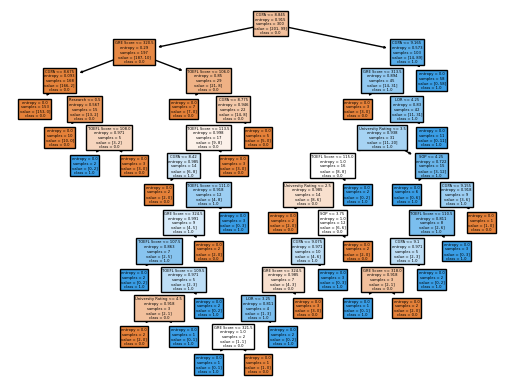

In [84]:
plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)

In [85]:
plt.savefig('Tree_visualization.png')

<Figure size 640x480 with 0 Axes>

In [86]:
import graphviz

In [87]:
from sklearn import tree

In [88]:
dot_data=tree.export_graphviz(model,out_file=None,feature_names=feature_names,class_names=class_names,filled=True)


In [89]:
#graph=graphviz.Source(dot_data,format='png')

In [90]:
#graph

In [91]:
sf= StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [92]:
depth=[1,2,3,4,5,6,7,8,9,10]

In [93]:
for d in depth:
    score=cross_val_score(tree.DecisionTreeClassifier(criterion='entropy',max_depth=d,random_state=0),x_train,y_train,cv=sf,scoring='accuracy')
    print('Average score for depth {} is : {}'.format(d,score.mean()))

Average score for depth 1 is : 0.9199999999999999
Average score for depth 2 is : 0.9199999999999999
Average score for depth 3 is : 0.9233333333333332
Average score for depth 4 is : 0.9033333333333333
Average score for depth 5 is : 0.8833333333333334
Average score for depth 6 is : 0.9
Average score for depth 7 is : 0.89
Average score for depth 8 is : 0.8866666666666667
Average score for depth 9 is : 0.9
Average score for depth 10 is : 0.9033333333333333


In [94]:
score.mean()

0.9033333333333333